In [1]:
from sklearn import set_config
import AstroTools
import pandas as pd
import numpy as np
import sklearn

print('sklearn: {}'.format(sklearn.__version__))
print('Pandas Version: {}'.format(pd.__version__))
set_config(display='diagram')

path = AstroTools.Path()
AstroTools.ChangeFolder(path , '/Users/Andres/Documents/PhD/JPLUS_Code/Datasets/Other_Surveys')

sklearn: 0.23.2
Pandas Version: 1.0.1
Last path:  /Users/Andres/Documents/PhD/JPLUS_Code/Scripts_and_Notebooks
New path is: /Users/Andres/Documents/PhD/JPLUS_Code/Datasets/Other_Surveys


In [2]:
stellar = ['Teff_GAIA', 'objtype',
           'teff', 'logg', 'feh']

def correctMags(df):
    
    Filters = list(AstroTools.Filters['JPLUS'])
    Correction = list(AstroTools.Filters['Ax'])
    #ID = AstroTools.Reference['Full']
    
    dfcp = pd.concat([df[a].sub(df[b]) for a, b in zip(Filters,Correction)],axis=1, keys=Filters).round(3)
    
    return dfcp
    
def add_id_columns(df1, df2, columns=AstroTools.Reference['Full']):
    
    df = df1.join(df2[columns])
    
    return df

def order_columns(df,reference=AstroTools.Reference['Full'],
                  filters=AstroTools.Filters['JPLUS']):
    
    return df[reference + filters]

def add_gaia_filters(df1, df2, columns=AstroTools.Filters['GAIA']):
    
    df = df1.join(df2[columns])
    
    return df

def add_wise_filters(df1, df2, columns=AstroTools.Filters['WISE']):
    
    df = df1.join(df2[columns])
    
    return df

def add_stellar_params(df1, df2, columns=AstroTools.Stellar_Params['lamost_dr6_mrs']):
    
    df = df1.join(df2[columns])
    
    return df

def remove_contaminants(df):
    
    df1 = df.replace(np.nan, 'OK', regex=True)
    dfcp = df1[df1.subclass.str.contains('R|S|W') == False].copy()
    
    return dfcp

def remove_bad_values(df, Column = list(['feh_lasp','teff_lasp','logg_lasp'])):
    
    df_clean = df[(df[Column[0]].between(-5.0,1.0)) &
              (df[Column[1]].between(3500,10000)) &
              (df[Column[2]].between(0.0,5.0))].copy()
    
    return df_clean

def remove_spec_subclasses(df):
    
    #df['SPECTYPE_SUBCLASS'] = df.SPECTYPE_SUBCLASS.map(lambda x: x.rstrip(r'(\d)'))
    df = df.assign(SPECTYPE_SUBCLASS = df.subclass.str.replace(r'(\d)', '')) # Replace Original Column
    
    return df

In [3]:
df = AstroTools.Read_Dataset('DR2_LAMOST_dr6_MRS_stellar_sample.csv')

Working_df = (df.pipe(correctMags)            # MW Correction
              .pipe(add_id_columns, df)       # Add TILE_ID, NUMBER, RA, DEC
              .pipe(order_columns)            # Reorder columns
              .pipe(add_gaia_filters, df)     # Add GAIA mags G, RP, BP
              .pipe(add_wise_filters, df)     # Add WISE and 2MASS Filters
              .pipe(add_stellar_params, df)   # Add TEFF_ADOP, FEH_ADOP, LOGG_ADOP to Dataframe
              .pipe(remove_bad_values)        # Remove -9999.0 values
             )

In [4]:
Working_df.columns

Index(['TILE_ID', 'NUMBER', 'RA', 'DEC', 'FWHM_WORLD', 'uJAVA', 'J0378',
       'J0395', 'J0410', 'J0430', 'gSDSS', 'J0515', 'rSDSS', 'J0660', 'iSDSS',
       'J0861', 'zSDSS', 'G', 'BP', 'RP', 'W1', 'W2', 'W3', 'W4', 'J', 'H',
       'K', 'teff_lasp', 'teff_cnn', 'teff_lasp_err', 'logg_lasp', 'logg_cnn',
       'logg_lasp_err', 'feh_lasp', 'feh_cnn', 'feh_lasp_err', 'c_fe', 'n_fe',
       'o_fe', 'mg_fe', 'al_fe', 'si_fe', 's_fe', 'ca_fe', 'ti_fe', 'cr_fe'],
      dtype='object')

In [5]:
Working_df[AstroTools.Stellar_Params['lamost_dr6_mrs']].describe()

,teff_lasp,teff_cnn,teff_lasp_err,logg_lasp,logg_cnn,logg_lasp_err,feh_lasp,feh_cnn,feh_lasp_err,c_fe,n_fe,o_fe,mg_fe,al_fe,si_fe,s_fe,ca_fe,ti_fe,cr_fe
count,4622.000000,4622.000000,4622.000000,4622.000000,4622.000000,4622.000000,4622.000000,4622.000000,4622.000000,4622.000000,4622.000000,4622.000000,4622.000000,4622.000000,4622.000000,4622.000000,4622.000000,4622.000000,4622.000000
mean,5517.120017,3866.378157,-740.458652,4.122030,-1043.380151,-785.240338,-0.304851,-1047.250258,-783.098654,-1047.036186,-1047.019246,-8802.654097,-1046.987655,-8802.657975,-1047.025142,-8802.659033,-1047.016705,-8802.664238,-8802.668571
std,535.101493,4757.654801,2703.337289,0.530807,3063.162802,2690.192505,0.396326,3061.839051,2686.793501,3061.912262,3061.918058,3245.525548,3061.928862,3245.515028,3061.916040,3245.512158,3061.918926,3245.498038,3245.486283
min,3682.200000,-9999.000000,-9999.000000,0.279000,-9999.000000,-9999.000000,-2.493000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,5201.655000,5050.377500,34.710000,3.982000,3.879000,0.041000,-0.482000,-0.440750,0.025000,-0.031640,-0.061027,-9999.000000,0.000045,-9999.000000,-0.019712,-9999.000000,-0.009092,-9999.000000,-9999.000000
50%,5570.885000,5460.355000,43.530000,4.214000,4.207500,0.053000,-0.255000,-0.218000,0.032000,0.012640,0.019610,-9999.000000,0.044625,-9999.000000,0.020810,-9999.000000,0.027555,-9999.000000,-9999.000000
75%,5826.790000,5750.935000,54.150000,4.467000,4.372000,0.069000,-0.049000,-0.044000,0.042000,0.060185,0.108428,-9999.000000,0.119992,-9999.000000,0.067890,-9999.000000,0.077320,-9999.000000,-9999.000000
max,8368.600000,6845.930000,355.450000,4.902000,4.971000,0.346000,0.653000,0.407000,0.803000,0.333070,0.592210,0.584860,0.392980,0.367060,0.312620,0.707800,0.485100,0.349910,0.194000


In [6]:
Working_df[AstroTools.Stellar_Params['lamost_dr6_mrs']].isin([-9999.0]).sum()

teff_lasp           0
teff_cnn          484
teff_lasp_err     363
logg_lasp           0
logg_cnn          484
logg_lasp_err     363
feh_lasp            0
feh_cnn           484
feh_lasp_err      362
c_fe              484
n_fe              484
o_fe             4069
mg_fe             484
al_fe            4069
si_fe             484
s_fe             4069
ca_fe             484
ti_fe            4069
cr_fe            4069
dtype: int64

In [7]:
from sklearn.base import TransformerMixin

class FeaturesSelection(TransformerMixin):
    
    def __init__(self,cols):
        self.cols = cols
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        Xcols = X[self.cols]
        return Xcols
    
class MakeColors():
    def __init__(self, func):
        self.func = func

    def fit(self, X, y=None, **fit_params):
        return self
        
    def transform(self, X, **transform_params):
        return self.func(X)

In [8]:
JPLUS_GAIA = AstroTools.Filters['JPLUS'] + AstroTools.Filters['GAIA']
Colors = AstroTools.createColors(Working_df,filters=JPLUS_GAIA)
print('Shape of Colors combination: {}'.format(Colors.shape))
print('\nHighest Correlations between Colors and Teff\n')
print(Colors.corrwith(np.log10(Working_df.teff_lasp)).abs().sort_values(ascending=False, kind="mergesort").iloc[0:10])

Colors_comb = AstroTools.colorsComb(Working_df, filters=JPLUS_GAIA)
print('Shape of Colors combination: {}'.format(Colors_comb.shape))

print('\nHighest correlations between Colors Combination and Teff\n')
print(Colors_comb.corrwith(np.log10(Working_df.teff_lasp)).abs().sort_values(ascending=False, kind="mergesort").iloc[0:10])

Shape of Colors combination: (4622, 105)

Highest Correlations between Colors and Teff

J0430J0861    0.908591
J0430zSDSS    0.907367
J0430J0660    0.906235
J0430rSDSS    0.905698
J0430iSDSS    0.905515
J0395zSDSS    0.905278
J0395J0861    0.905259
J0410J0861    0.903439
J0410zSDSS    0.902801
gSDSSzSDSS    0.902500
dtype: float64
Shape of Colors combination: (4622, 1365)

Highest correlations between Colors Combination and Teff

uJAVAJ0395J0410zSDSS    0.906803
uJAVAJ0395J0410J0861    0.906718
uJAVAJ0378J0430J0861    0.906238
J0430J0861GBP           0.906167
uJAVAJ0378J0430zSDSS    0.906078
J0430J0660J0861zSDSS    0.905672
J0430iSDSSJ0861zSDSS    0.905426
J0430zSDSSGBP           0.905346
J0395J0861GBP           0.904648
J0395zSDSSGBP           0.904635
dtype: float64


In [9]:
Colors = AstroTools.createColors(Working_df,filters=JPLUS_GAIA)
print('Highest Correlations between Colors and Logg\n')
print(Colors.corrwith((Working_df.logg_lasp)).abs().sort_values(ascending=False, kind="mergesort").iloc[0:10])

Colors_comb = AstroTools.colorsComb(Working_df, filters=JPLUS_GAIA)
print('Shape of Colors combination: {}'.format(Colors_comb.shape))

print('\nHighest correlations between Colors Combination and Logg\n')
print(Colors_comb.corrwith((Working_df.logg_lasp)).abs().sort_values(ascending=False, kind="mergesort").iloc[0:10])

Highest Correlations between Colors and Logg

gSDSSJ0515    0.350786
uJAVAJ0378    0.350699
uJAVAJ0395    0.303700
J0515BP       0.199891
iSDSSJ0861    0.107452
J0410J0515    0.102287
J0660J0861    0.101672
J0430J0515    0.097421
uJAVAJ0515    0.096490
J0410J0430    0.091007
dtype: float64
Shape of Colors combination: (4622, 1365)

Highest correlations between Colors Combination and Logg

J0515J0660BPRP          0.431385
J0515rSDSSBPRP          0.410308
uJAVAJ0378GBP           0.389469
J0410gSDSSJ0515J0660    0.385626
uJAVAJ0378J0861RP       0.382261
uJAVAJ0378zSDSSRP       0.379908
J0395J0410J0430J0515    0.378248
uJAVAJ0395J0515BP       0.373031
J0410gSDSSJ0515rSDSS    0.350440
uJAVAJ0430J0515J0660    0.347982
dtype: float64


In [10]:
Colors = AstroTools.createColors(Working_df, filters=JPLUS_GAIA)
print('Highest Correlations between Colors and FeH\n')
print(Colors.corrwith((Working_df.feh_lasp)).abs().sort_values(ascending=False, kind="mergesort").iloc[0:10])

Colors_comb = AstroTools.colorsComb(Working_df, filters=JPLUS_GAIA)
print('Shape of Colors combination: {}'.format(Colors_comb.shape))

print('\nHighest correlations between Colors Combination and FeH\n')
print(Colors_comb.corrwith((Working_df.feh_lasp)).abs().sort_values(ascending=False, kind="mergesort").iloc[0:10])

Highest Correlations between Colors and FeH

uJAVAJ0378    0.395565
J0378J0395    0.386260
J0378J0410    0.328188
J0378J0430    0.302334
J0378gSDSS    0.252057
J0378J0515    0.246992
J0395J0410    0.232996
J0395J0430    0.231539
uJAVAJ0410    0.226376
uJAVAJ0430    0.221711
dtype: float64
Shape of Colors combination: (4622, 1365)

Highest correlations between Colors Combination and FeH

J0378J0410BPRP          0.584234
J0378J0410gSDSSrSDSS    0.575931
J0378J0430gSDSSiSDSS    0.570311
J0378J0430gSDSSJ0861    0.564520
J0378J0410gSDSSJ0660    0.557540
J0378J0410rSDSSzSDSS    0.555902
J0378J0430J0515J0861    0.555673
J0378J0430J0515iSDSS    0.552115
J0378J0410rSDSSJ0861    0.548125
J0378J0430gSDSSzSDSS    0.544832
dtype: float64


In [11]:
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV, GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

Filters = JPLUS_GAIA
X, y = [Working_df[JPLUS_GAIA], Working_df[['teff_lasp','logg_lasp','feh_lasp']]]

imp = IterativeImputer(max_iter=10, random_state=0)
X_t = imp.fit_transform(X)
X_t_df = pd.DataFrame(X_t, columns=JPLUS_GAIA)

X_train, X_test, y_train, y_test = train_test_split(X_t_df, y,random_state=42)

In [12]:
Teff_Features =  ['J0430J0861', 'J0430zSDSS', 'J0430J0660', 'J0430rSDSS', 
                  'J0430iSDSS', 'J0395zSDSS', 'J0395J0861', 'J0410J0861', 
                  'J0410zSDSS', 'gSDSSzSDSS']

Logg_Features = ['J0515J0660BPRP', 'J0515rSDSSBPRP', 'uJAVAJ0378GBP', 'J0410gSDSSJ0515J0660', 
                 'uJAVAJ0378J0861RP', 'uJAVAJ0378zSDSSRP', 'J0395J0410J0430J0515', 'uJAVAJ0395J0515BP', 
                 'J0410gSDSSJ0515rSDSS', 'uJAVAJ0430J0515J0660']

FeH_Features = ['J0378J0410BPRP', 'J0378J0410gSDSSrSDSS', 'J0378J0430gSDSSiSDSS', 'J0378J0430gSDSSJ0861', 
                'J0378J0410gSDSSJ0660', 'J0378J0410rSDSSzSDSS', 'J0378J0430J0515J0861', 
                'J0378J0430J0515iSDSS', 'J0378J0410rSDSSJ0861', 'J0378J0430gSDSSzSDSS']

In [13]:
from  itertools import combinations

def colorsComb(Dataset, filters = JPLUS_GAIA):
    # Creating all the possible color combinations based on a set of Photometric Filters

    df = Dataset[filters].copy()

    cc = list(combinations(df.columns,4))

    df = pd.concat([(df[c[0]].sub(df[c[1]])).sub(df[c[2]].sub(df[c[3]])) for c in cc], axis=1, keys=cc)
    df.columns = df.columns.map(''.join)
    
    return df

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import (mean_absolute_error, median_absolute_error, r2_score, max_error, 
                             mean_squared_error,explained_variance_score)


reg_rf = RandomForestRegressor(random_state=42)

Teff_estimator = Pipeline([('filters_select', FeaturesSelection(Filters)),
                           ('make_colors_indx', MakeColors(AstroTools.createColors)),
                           ('features_select', FeaturesSelection(Teff_Features)),
                           ('std_scaler', StandardScaler()),
                           ('rgr', reg_rf)])

Logg_estimator = Pipeline([('filters_select', FeaturesSelection(Filters)),
                           ('make_colors_indx', MakeColors(colorsComb)),
                           ('features_select', FeaturesSelection(Logg_Features)),
                           ('std_scaler', StandardScaler()),
                           ('rgr', reg_rf)])

FeH_estimator = Pipeline([('filters_select', FeaturesSelection(Filters)),
                          ('make_colors_indx', MakeColors(colorsComb)),
                          ('features_select', FeaturesSelection(FeH_Features)),
                          ('std_scaler', StandardScaler()),
                          ('rgr', reg_rf)])

In [15]:
Teff_estimator.fit(X_train,y_train.iloc[:,0])
Teff_predict = Teff_estimator.predict(X_test)


print("Teff prediction errors")
print("Mean Absolute Error = ", mean_absolute_error(y_test.iloc[:,0], Teff_predict))
print("Median Absolute Error = ", median_absolute_error(y_test.iloc[:,0], Teff_predict))
print("Root of MSE = ", np.sqrt(mean_squared_error(y_test.iloc[:,0], Teff_predict)))
print("Max Error = ", max_error(y_test.iloc[:,0], Teff_predict))
print("R2 Scorre = ", r2_score(y_test.iloc[:,0], Teff_predict))

Teff prediction errors
Mean Absolute Error =  124.05114861591687
Median Absolute Error =  80.1878499999998
Root of MSE =  227.24601243425323
Max Error =  2633.5886000000028
R2 Scorre =  0.8186477232102534


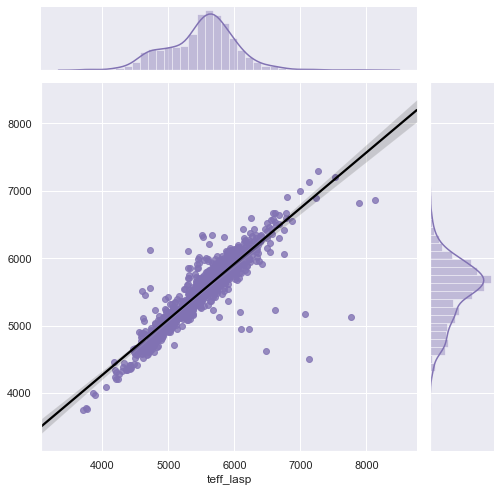

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

t = sns.jointplot(y_test.iloc[:,0], Teff_predict,
                  kind="reg",lowess=False,truncate=False,color="m",height=7,
                  joint_kws={'line_kws':{'color':'black'}})

Mean of Teff_predict - Teff_Lamost =  3.74393287197223
Std of Teff_predict - Teff_Lamost =  227.31350950650673


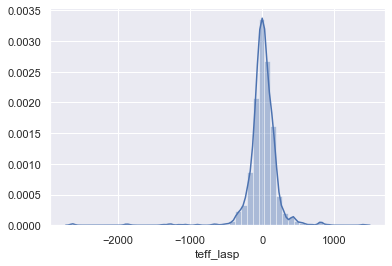

In [17]:
diff_teff = Teff_predict-y_test.iloc[:,0]
hist_Teff = sns.distplot(diff_teff, kde=True)
print("Mean of Teff_predict - Teff_Lamost = ", diff_teff.mean())
print("Std of Teff_predict - Teff_Lamost = ", diff_teff.std())

In [18]:
Logg_estimator.fit(X_train,y_train.iloc[:,1])
Logg_predict = Logg_estimator.predict(X_test)


print("Logg prediction errors")
print("Mean Absolute Error = ", mean_absolute_error(y_test.iloc[:,1], Logg_predict))
print("Median Absolute Error = ", median_absolute_error(y_test.iloc[:,1], Logg_predict))
print("Root of MSE = ", np.sqrt(mean_squared_error(y_test.iloc[:,1], Logg_predict)))
print("Max Error = ", max_error(y_test.iloc[:,1], Logg_predict))
print("R2_Score = ", r2_score(y_test.iloc[:,1], Logg_predict))

Logg prediction errors
Mean Absolute Error =  0.20417010380622838
Median Absolute Error =  0.145929999999999
Root of MSE =  0.2921733366916451
Max Error =  2.3390199999999988
R2_Score =  0.6669956436911441


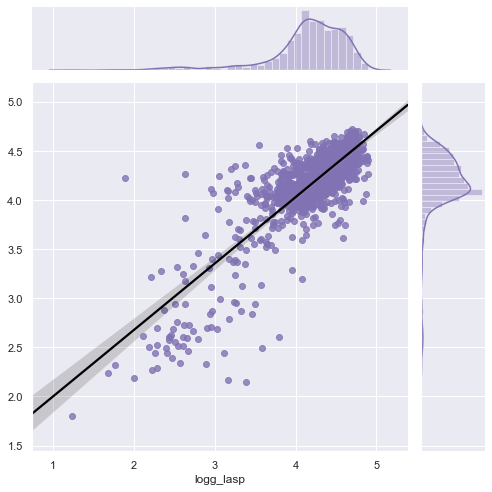

In [19]:
g = sns.jointplot(y_test.iloc[:,1], Logg_predict,
                  kind="reg",lowess=False,truncate=False,color="m",height=7,
                  joint_kws={'line_kws':{'color':'black'}})

Mean of Logg_predict - Logg_Lamost =  -0.014752664359861518
Std of Logg_predict - Logg_Lamost =  0.2919269402587327


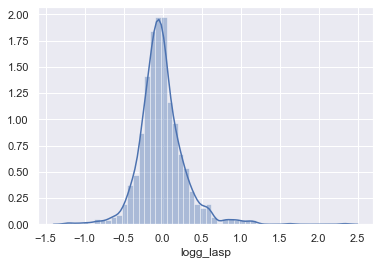

In [20]:
diff_logg = Logg_predict-y_test.iloc[:,1]
hist_Logg = sns.distplot(diff_logg, kde=True)
print("Mean of Logg_predict - Logg_Lamost = ", diff_logg.mean())
print("Std of Logg_predict - Logg_Lamost = ", diff_logg.std())

In [21]:
FeH_estimator.fit(X_train,y_train.iloc[:,2])
FeH_predict = FeH_estimator.predict(X_test)


print("FeH prediction errors")
print("Mean Absolute Error = ", mean_absolute_error(y_test.iloc[:,2], FeH_predict))
print("Median Absolute Error = ", median_absolute_error(y_test.iloc[:,2], FeH_predict))
print("Root of MSE = ", np.sqrt(mean_squared_error(y_test.iloc[:,2], FeH_predict)))
print("Max Error = ", max_error(y_test.iloc[:,2], FeH_predict))
print("R2 Score = ", r2_score(y_test.iloc[:,2], FeH_predict))

FeH prediction errors
Mean Absolute Error =  0.1578839792387543
Median Absolute Error =  0.11031499999999991
Root of MSE =  0.2395273517752052
Max Error =  1.76644
R2 Score =  0.6088548984290385


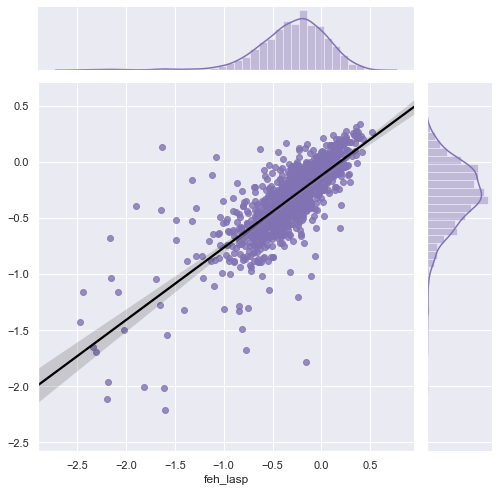

In [22]:
m = sns.jointplot(y_test.iloc[:,2], FeH_predict,
                  kind="reg",lowess=False,truncate=False,color="m",height=7,
                  joint_kws={'line_kws':{'color':'black'}})

Mean of FeH_predict - FeH_Lamost =  -0.012859896193771609
Mean of FeH_predict - FeH_Lamost =  0.2392854070621307


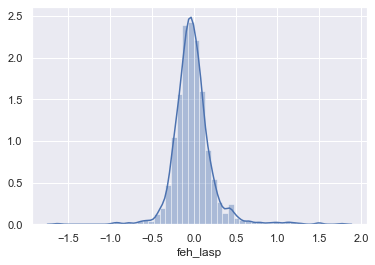

In [23]:
diff_feh = FeH_predict-y_test.iloc[:,2]
hist_FeH = sns.distplot(diff_feh, kde=True)
print("Mean of FeH_predict - FeH_Lamost = ",diff_feh.mean())
print("Mean of FeH_predict - FeH_Lamost = ",diff_feh.std())